# Table of Contents

1. [Logistic Regression](#logreg)
    1. [Visualizing the data](#plot)
    2. [Implementation](#implementation)
        1. [Warmup exercise: sigmoid function](#sigmoid)
        2. [Cost function and gradient](#gradient)
        3. [Learning parameters using optimization](#optimization)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<div id='logreg'/>

## 1. Logistic Regression

In [2]:
# import the data 
data_directory = '~/Documents/Machine-Learning/Week 3/01. Data/'
file = 'ex2data1.txt'
df = pd.read_csv(data_directory+file, names = ['exam_1','exam_2', 'admit'])

In [3]:
df.head()

,exam_1,exam_2,admit
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
df.describe()

,exam_1,exam_2,admit
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [78]:
# separate the independent variables and the target variable

X = df[['exam_1', 'exam_2']]
X.insert(0, 'int', 1)
Y = df[['admit']]

<div id='plot'/>

### 1.1 Visualizing the data

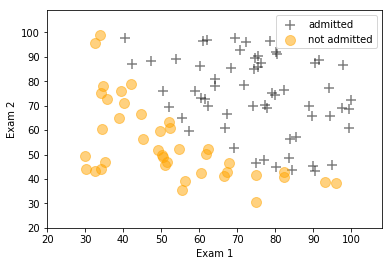

In [61]:
colors = ['black', 'orange']

plt.figure()

y = plt.scatter(df['exam_1'].loc[df['admit'] == 1], df['exam_2'].loc[df['admit'] == 1], marker='+', color=colors[0], s=100, alpha= 0.5)
n = plt.scatter(df['exam_1'].loc[df['admit'] == 0], df['exam_2'].loc[df['admit'] == 0], marker='o', color=colors[1], s=100, alpha=0.5)

plt.xlabel('Exam 1')
plt.ylabel('Exam 2')

plt.xlim(20,108)
plt.ylim(20,109)

plt.legend((y,n), ('admitted','not admitted'), loc='upper right')

plt.show()

<div id='implementation'/>

### 1.2 Implementation

<div id='sigmoid'/>

#### 1.2.1 Warmup exercise: sigmoid function

The logistic regression hypothesis is defined by:

$$ h_{\theta}(x) = g(\theta^Tx) $$

where the function $g$ is the sigmoid function defined as:

$$ g(z) = \frac{1}{1 + e^{-z}} $$



In [62]:
# define the sigmiod function

def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return(g)

In [67]:
# lets try the sigmoid function
print('With a value of z=2 (large positive number), the sigmoid function should be close to 1. It is {}'.format(round(sigmoid(2),2)))
print('With a value of z=2, the sigmoid function should be equal to 0.5. It is {}'.format(sigmoid(0)))
print('With a value of z=-2 (large negative number), the sigmoid function should be close to 0. It is {}'.format(round(sigmoid(-2),2)))

With a value of z=2 (large positive number), the sigmoid function should be close to 1. It is 0.88
With a value of z=2, the sigmoid function should be equal to 0.5. It is 0.5
With a value of z=-2 (large negative number), the sigmoid function should be close to 0. It is 0.12


<div id='gradient'/>

#### 1.2.2 Cost function and gradient

The cost function in logistic regression is:

$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}log(h_{\theta}(x^{(i)})) - (1-y^{(i)})log(1-h_{\theta}(x^{(i)})\big] $$

THe gradient of the cost $J$ is a vector of the same length as $\theta$ and every element of this vector is defined as:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)} $$

In [224]:
# define a function which returns both the cost and the gradient for logistic regression

def costFunction(theta, x, y):
    m = len(y)
    z = np.matmul(x,theta)
    h = sigmoid(z)
    J = 1/m * sum( -1*y.values.transpose()[0]*np.log(h) - ((1-y.values.transpose()[0])*np.log(1-h)))
    return(J)

def gradient(theta, x, y):
    m = len(y)
    z = np.matmul(x,theta)
    h = sigmoid(z)
    grad = 1/m * np.array(np.transpose(np.transpose(x) * np.transpose(h-y.values.transpose()[0])).sum())
    return(grad)

In [225]:
# compute with initial values of zero for all theta
initial_theta = np.zeros(X.shape[1])

cost = costFunction(initial_theta,X,Y)
grad = gradient(initial_theta,X,Y)

In [226]:
print('Cost at initial theta (zeros): {}\nExpected cost (approx): 0.693'.format(cost))

Cost at initial theta (zeros): 0.693147180559946
Expected cost (approx): 0.693


In [227]:
print('Gradient at initial theta (zeros): {}\nExpected gradients (approx): -0.1000, -12.0092, -11.2628'.format(grad))

Gradient at initial theta (zeros): [ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx): -0.1000, -12.0092, -11.2628


In [229]:
# compute with initial values of theta different from zero

test_theta = np.array([-24,0.2,0.2])
test_cost = costFunction(test_theta,X,Y)
test_grad = gradient(test_theta,X,Y)

In [230]:
print('Cost at test theta: {}\nExpected cost (approx): 0.218'.format(test_cost))

Cost at test theta: 0.21833019382659785
Expected cost (approx): 0.218


In [231]:
print('Gradient at test theta: {}\nExpected gradients (approx):0.043, 2.566, 2.647'.format(test_grad))

Gradient at test theta: [0.04290299 2.56623412 2.64679737]
Expected gradients (approx):0.043, 2.566, 2.647


<div id='optimization'/>

#### 1.2.3 Learning parameters using optimization


In [244]:
from scipy.optimize import minimize

res = minimize(fun = costFunction, jac = gradient, x0 = initial_theta, args = (X, Y), method = 'TNC')
print(res)

     fun: 0.20349770158947486
     jac: array([9.22161957e-09, 1.05799597e-07, 4.83191247e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131855,   0.20623159,   0.20147149])


In [236]:
print('Cost at theta found by optimization: {}'.format(res.fun))
print('Expected cost (approx): 0.203')

Cost at theta found by optimization: 0.20349770158947486
Expected cost (approx): 0.203


In [238]:
print('Theta parameters found by optimization are: {}'.format(res.x))
print('Expected theta (approx): -25.161, 0.206, 0.201')

Theta parameters found by optimization are: [-25.16131855   0.20623159   0.20147149]
Expected theta (approx): -25.161, 0.206, 0.201


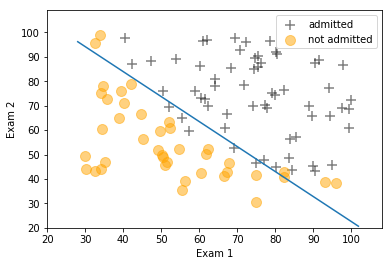

In [295]:
colors = ['black', 'orange']

plt.figure()

y = plt.scatter(df['exam_1'].loc[df['admit'] == 1], df['exam_2'].loc[df['admit'] == 1], marker='+', color=colors[0], s=100, alpha= 0.5)
n = plt.scatter(df['exam_1'].loc[df['admit'] == 0], df['exam_2'].loc[df['admit'] == 0], marker='o', color=colors[1], s=100, alpha=0.5)

plot_x = np.array([min(X.iloc[:,1].values)-2, max(X.iloc[:,1].values)+2])
plot_y = (-1/res.x[2]) * (res.x[1] *plot_x + res.x[0])
plt.plot(plot_x, plot_y)
    
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')

plt.xlim(20,108)
plt.ylim(20,109)

plt.legend((y,n), ('admitted','not admitted'), loc='upper right')

plt.show()

In [279]:
 u = np.linspace(-1, 1.5, 50)

In [281]:
np.ones(u.shape[0])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

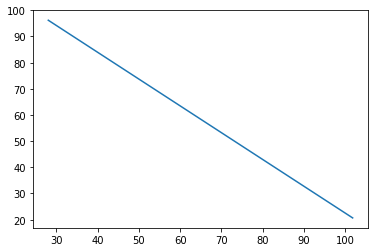

In [276]:
if X.shape[1] <= 3:
    plot_x = np.array([min(X.iloc[:,1].values)-2, max(X.iloc[:,1].values)+2])
    plot_y = (-1/res.x[2]) * (res.x[1] *plot_x + res.x[0])
    plt.plot(plot_x, plot_y)
else:
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros(len(u))
    for i in range(len(u)):
        for j in range(len(u)):
            z[i,j] = mapFeature(u[i], v[j]) @ res.x